In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os

In [3]:
DATA_PATH = '../input/'
SUB_PATH = '../submissions/'

In [4]:
train_df = pd.read_csv(f'{DATA_PATH}/train.csv')
test_df = pd.read_csv(f'{DATA_PATH}/test.csv')

In [5]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
train_df.shape

(54808, 14)

In [7]:
train_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [9]:
test_df.shape

(23490, 13)

In [10]:
test_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

## EDA

- This dataset contains data of employees who are nominated for promotion and have completed atleast 60% KPI.
- so the main goal of this problem is to predict if an employee will get promoted or not out of all employees who has nominated and got KPI > 60%.
- All the nominated employees have cleared 3 steps of the pramotion process in this company and how after final decision they will be promoted

In [42]:
def plot_dist_train_test(train_se, test_se, figsize=(14, 7), categorical=True, freq=True, kde=False):
    f, ax = plt.subplots(ncols=2, figsize=figsize)
    if categorical:
        tr = train_se.fillna('missing').value_counts(normalize= (True if freq else False))
        te = test_se.fillna('missing').value_counts(normalize= (True if freq else False))
        sns.barplot(x=tr.values, y=tr.index, ax=ax[0], orient="h")
        sns.barplot(x=te.values, y=te.index, ax=ax[1], orient="h")
        ax[0].set(title='Train dataset', ylabel=train_se.name)
        ax[1].set(title='Test dataset')
    else:
        sns.distplot(train_se, ax=ax[0], kde=kde, orient="h")
        sns.distplot(test_se, ax=ax[1], kde=kde, orient="h")
    f.suptitle('Distribution of ' + train_se.name)
    plt.show()

### Univariate analysis

#### `is_promoted` (target variable)

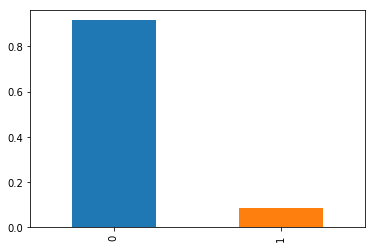

In [27]:
train_df['is_promoted'].value_counts(normalize=True).plot(kind='bar')
plt.show()

- imbalanced dataset.
- around 8.5% employees are promoted

#### `department`

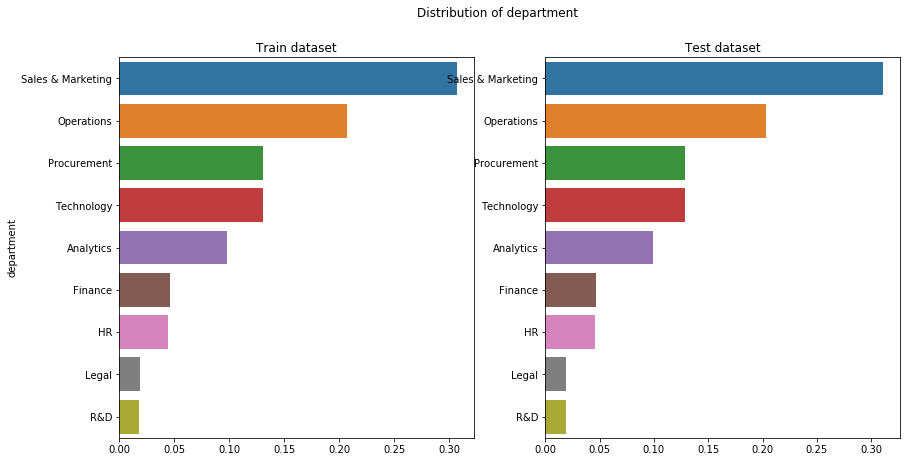

In [21]:
plot_dist_train_test(train_df['department'], test_df['department'])

- more employees are from Sales & Marketing department in this dataset.
- maybe because there are more positions available for promotion for this department (maybe because this company has big Sales & Marketing department compared to others)
- or there are more qualified employees in this department, so that they are nominated for promotion.

#### `region`

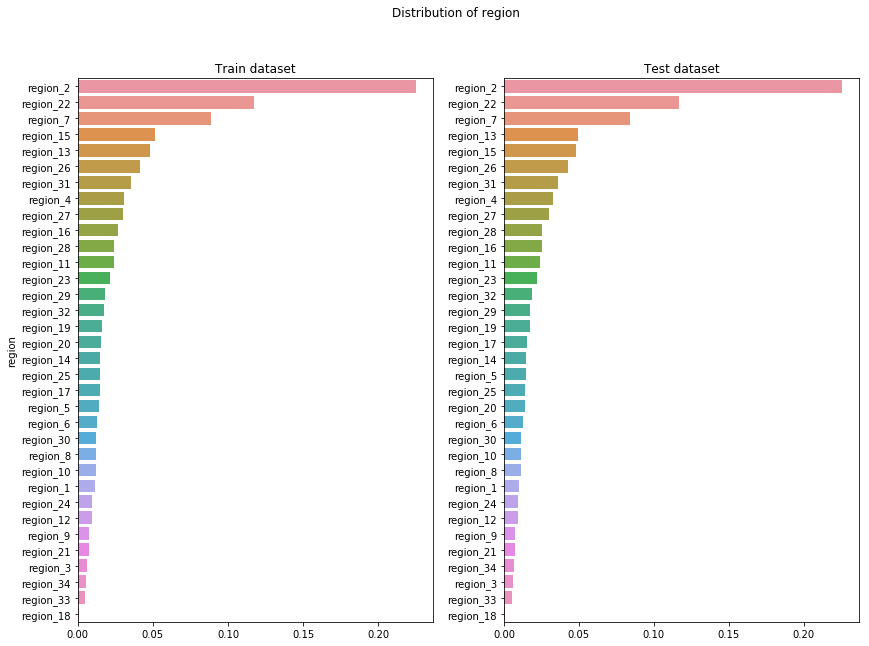

In [23]:
plot_dist_train_test(train_df['region'], test_df['region'], figsize=(14,10))

- There are total 34 regions.
- 23% employees are employed in at region 2 office.

#### `education`

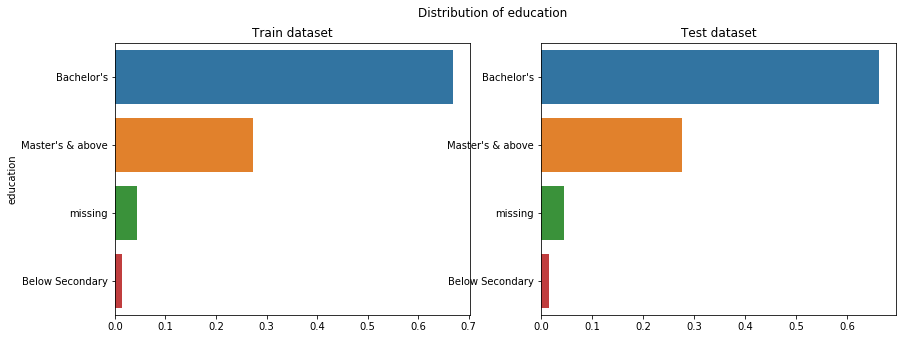

In [34]:
plot_dist_train_test(train_df['education'], test_df['education'], figsize=(14,5))

- More employees has Education level of Bachelor's.
- Maybe in this company most employees has Bachelor's degree, that's why we have more Bachelor's degree employees.

#### `gender`

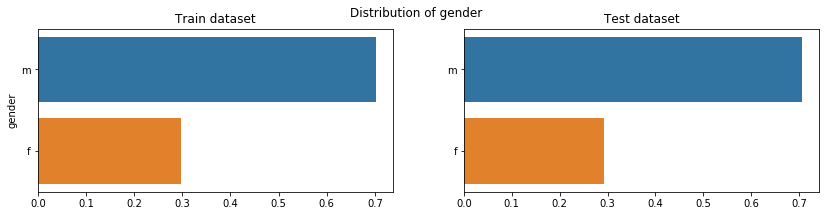

In [33]:
plot_dist_train_test(train_df['gender'], test_df['gender'], figsize=(14, 3))

- 70% employees are Male.
- 30% employees are Female.
- maybe company has more Male employees.
- or Male employees performs well.

#### `recruitment_channel`

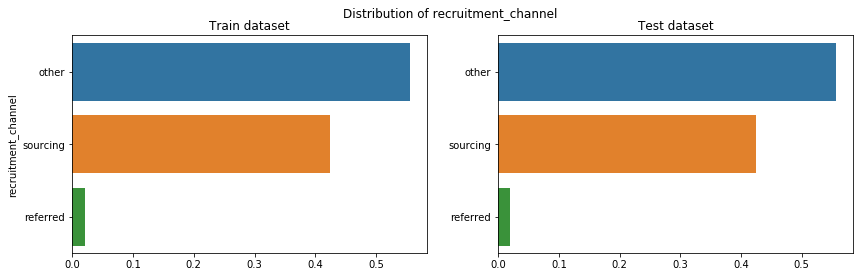

In [44]:
plot_dist_train_test(train_df['recruitment_channel'], test_df['recruitment_channel'], figsize=(14, 4))

#### `no_of_trainings`

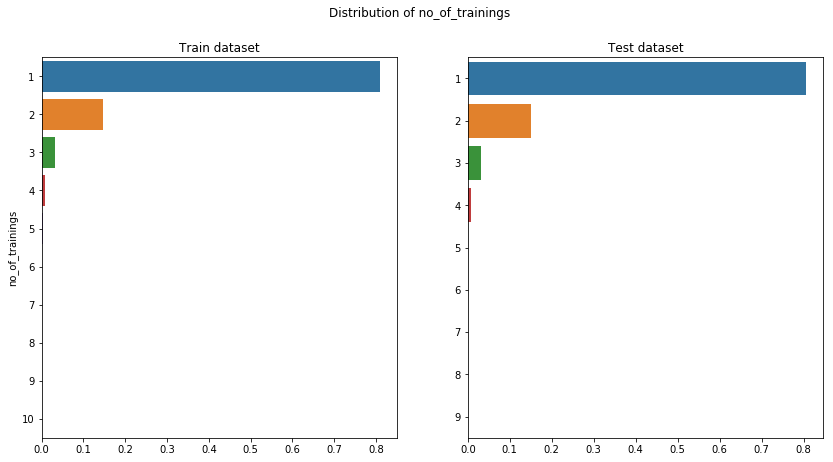

In [43]:
plot_dist_train_test(train_df['no_of_trainings'], test_df['no_of_trainings'], categorical=True)

#### `previous_year_rating`

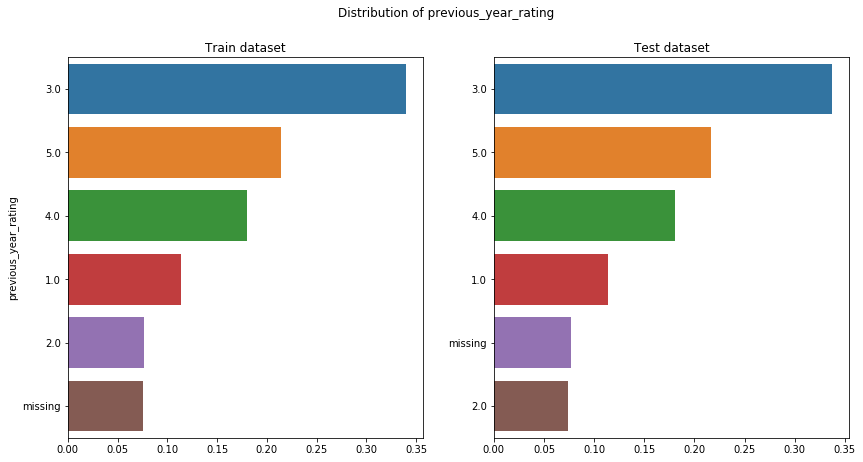

In [45]:
plot_dist_train_test(train_df['previous_year_rating'], test_df['previous_year_rating'])

- previous year rating is ordinal variable with minimum value 1 and maximum value 5.

#### `length_of_service`

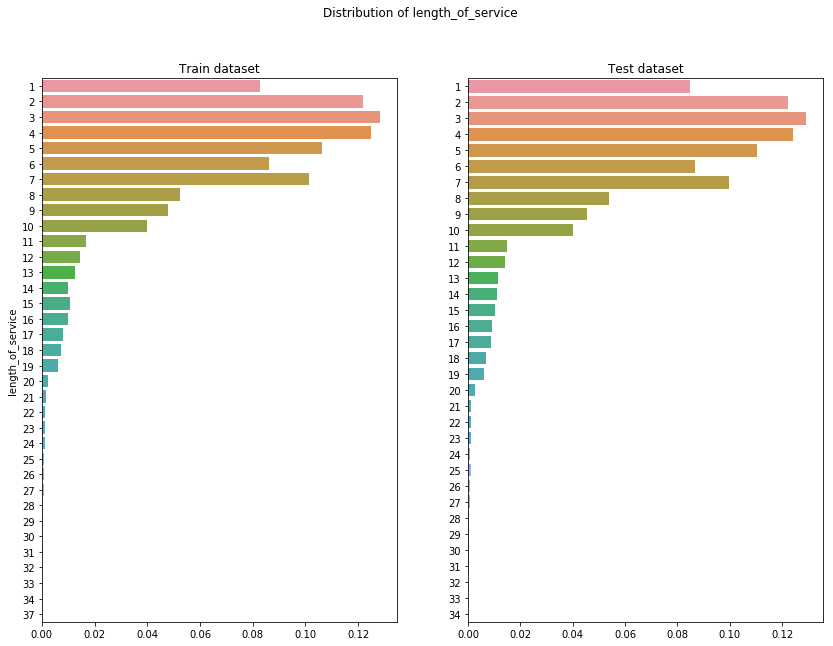

In [49]:
plot_dist_train_test(train_df['length_of_service'], test_df['length_of_service'], figsize=(14, 10))

#### `KPIs_met >80%`

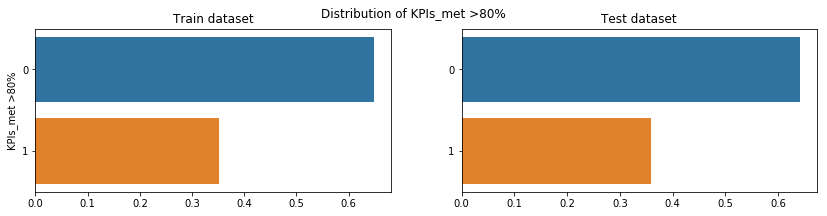

In [52]:
plot_dist_train_test(train_df['KPIs_met >80%'], test_df['KPIs_met >80%'], figsize=(14,3))

#### `awards_won?`

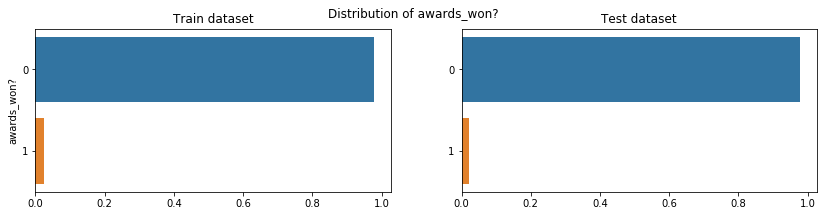

In [53]:
plot_dist_train_test(train_df['awards_won?'], test_df['awards_won?'], figsize=(14, 3))

#### `avg_training_score`

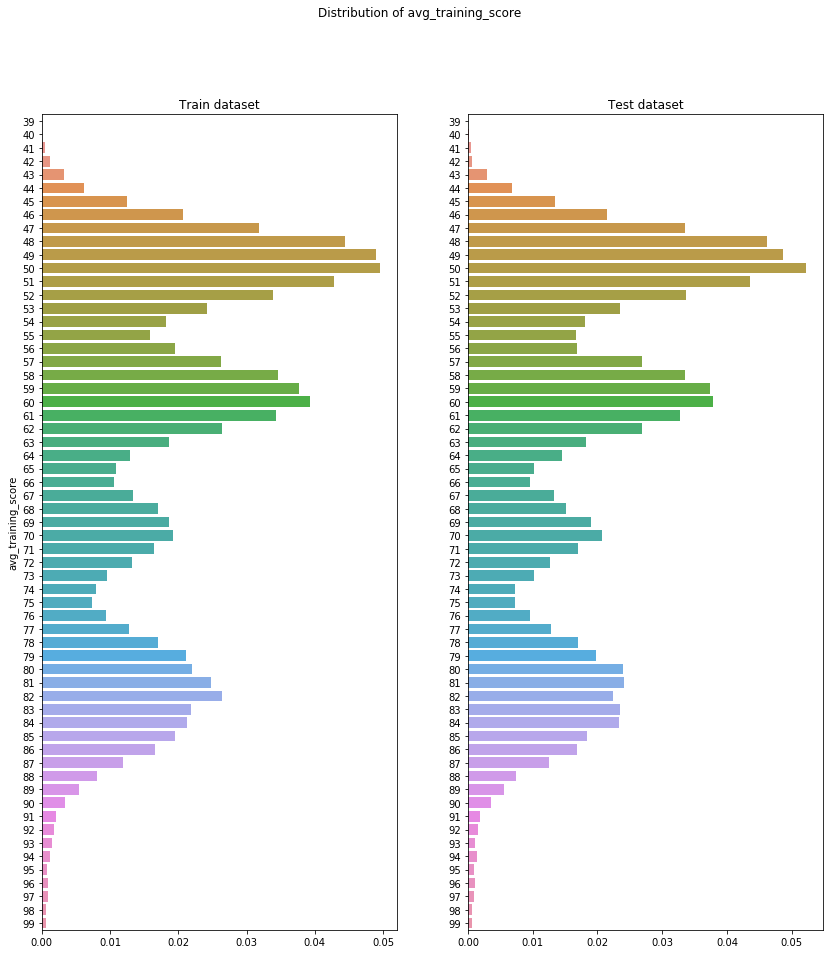

In [55]:
plot_dist_train_test(train_df['avg_training_score'], test_df['avg_training_score'], figsize=(14,15))

#### `age`

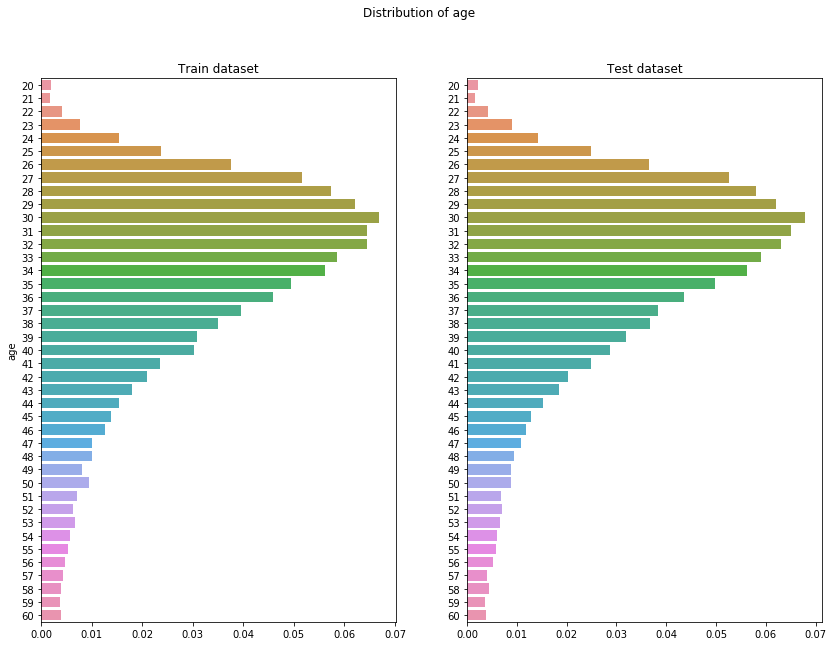

In [57]:
plot_dist_train_test(train_df['age'], test_df['age'], figsize=(14, 10))

#### `employee_id`

In [69]:
train_df['employee_id'].nunique()

54808

In [70]:
train_df.shape[0]

54808

In [71]:
test_df['employee_id'].nunique()

23490

In [72]:
test_df.shape[0]

23490

In [74]:
len(set(test_df['employee_id'].unique()) - set(train_df['employee_id'].unique()))

23490

- Every record has unique employee id.
- That means this data is only of one promotion period.

### Fill missing values

#### `previous_year_rating`

In [67]:
train_df['previous_year_rating'].isnull().sum()

4124

In [66]:
train_df[train_df['length_of_service'] == 1]['previous_year_rating'].isnull().sum()

4124

- Every records with `length_of_service` = 1 has missing value in `previous_year_rating` column.
- There must be some relation between them.
- Any employee who is employeed here for last 1 year doesn't have any rating for that last year. Why?
- previous_year_rating has values betweek [1, 5].
- This is ordinal veriable, so putting 0 in this missing values maybe considered as little bit less qualified.

In [76]:
print(train_df[train_df['length_of_service']==1]['is_promoted'].value_counts())
print(train_df[train_df['length_of_service']==1]['is_promoted'].value_counts(normalize=True))

0    4170
1     377
Name: is_promoted, dtype: int64
0    0.917088
1    0.082912
Name: is_promoted, dtype: float64
